In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from random import randint
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
X, y = load_wine(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

models = [
    RandomForestClassifier(max_depth = 2),
    DecisionTreeClassifier(max_depth = 2),
    LogisticRegression(max_iter=10, multi_class='multinomial'),
]

In [5]:
def bag_data(X_train, y_train):
    seed = randint(0,100)
    bagged_train_x = X_train.sample(n=len(X_train), replace=True, random_state=seed)
    bagged_train_y = y_train.sample(n=len(X_train), replace=True, random_state=seed)


    return bagged_train_x, bagged_train_y

In [6]:
def train_models(models, X_train, y_train):
  for model in models:
        x_train_bag, y_train_bag = bag_data(X_train, y_train)
        model.fit(x_train_bag, y_train_bag)

In [7]:
train_models(models, X_train, y_train)

c:\Users\Julia Grochowska\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
for model in models:
    print(model.score(X_train, y_train))

1.0
0.9225352112676056
0.647887323943662


In [23]:
def soft_voting(X_test):
    model_prediction_arrays = []
    for model in models:
        model_prediction_arrays.append(np.array(model.predict_proba(X_test)))

    ensamble_array = np.zeros(shape=(36,3))
    for array in model_prediction_arrays:
        ensamble_array = np.add(ensamble_array, array)

    ensamble_array = np.divide(ensamble_array, len(model_prediction_arrays))
    

    return ensamble_array

In [19]:
for model in models:
    print(f"Score of model is: {model.score(X_train, y_train)}")

Score of model is: 1.0
Score of model is: 0.9225352112676056
Score of model is: 0.647887323943662


In [24]:
probas_test = [model.predict_proba(X_test) for model in models]

voting_result = soft_voting(X_test)

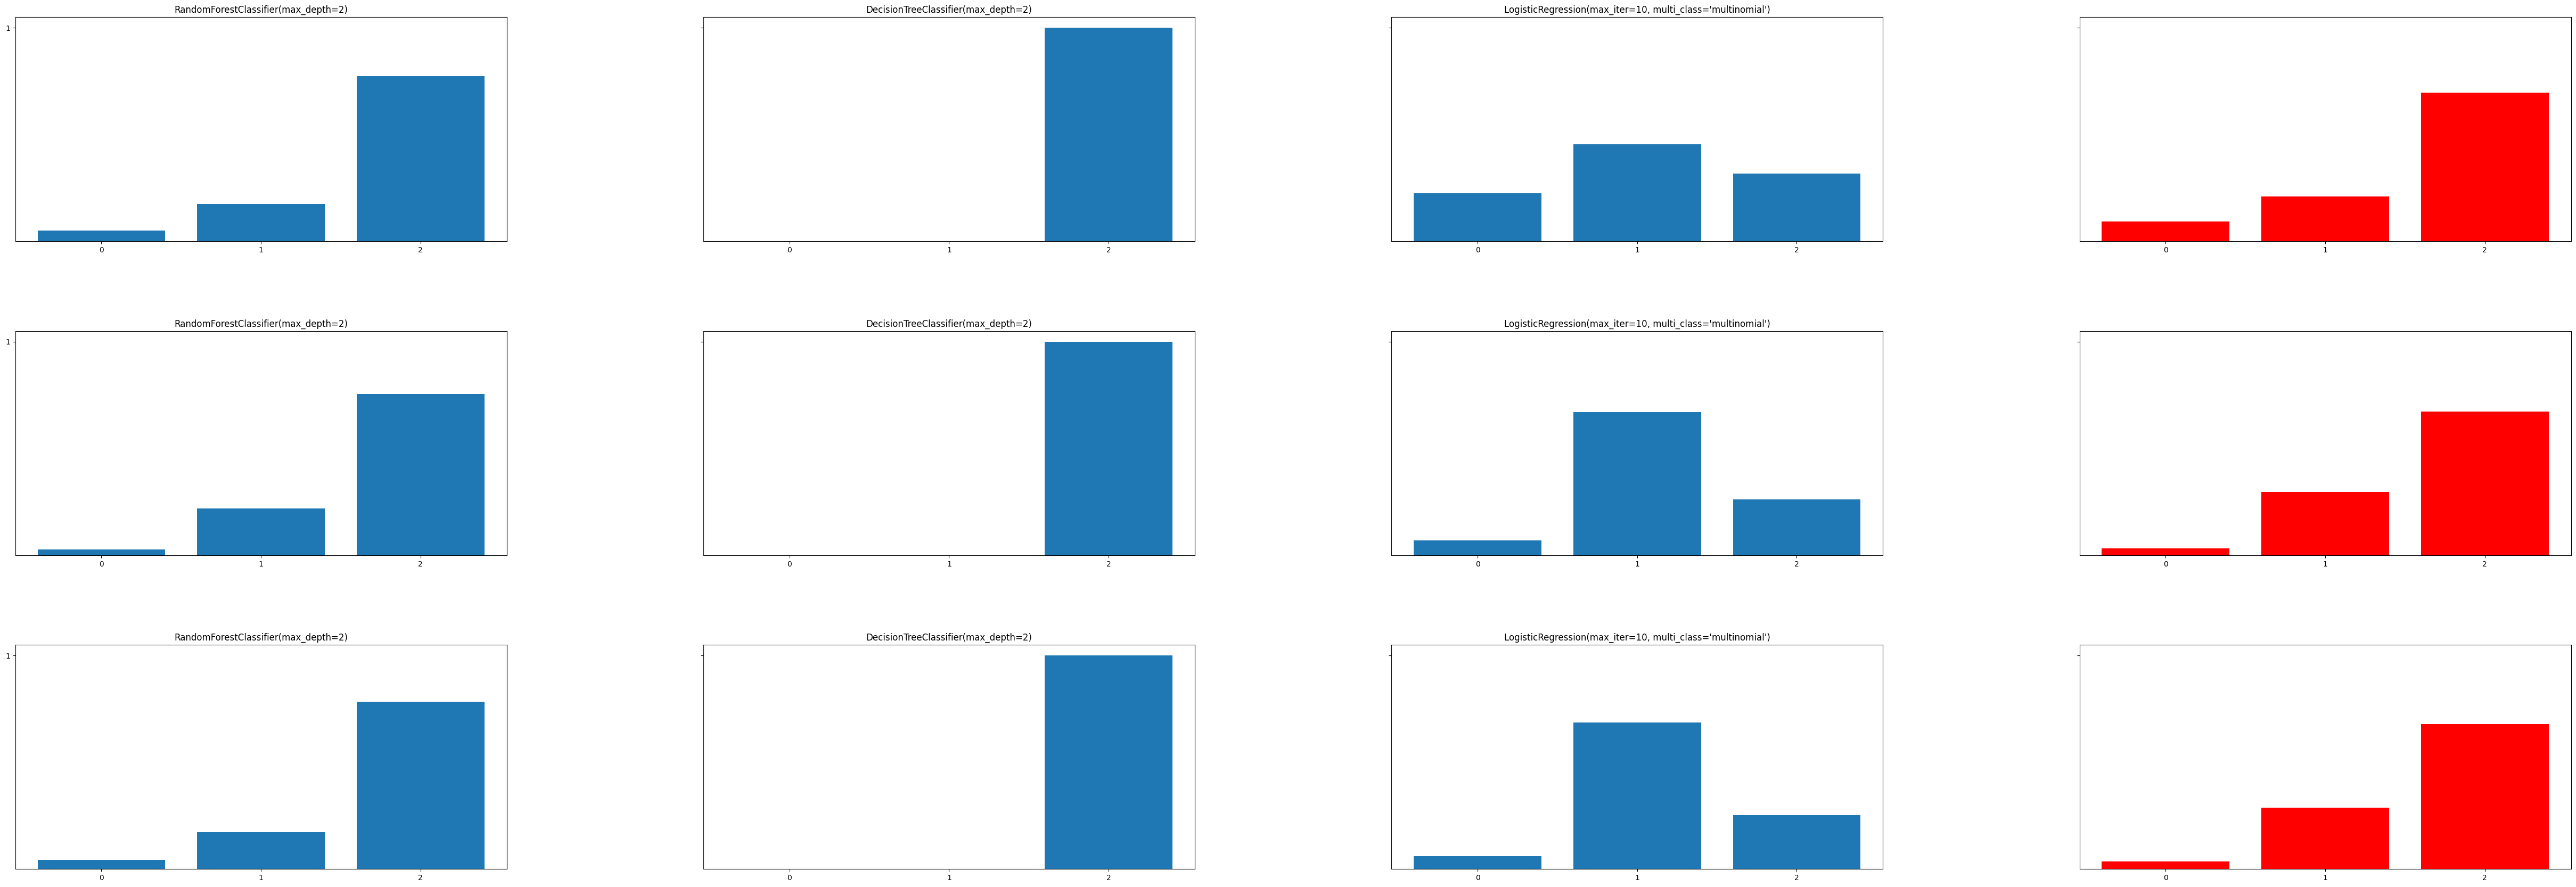

In [25]:
idx = np.random.randint(0, len(y_test), 3)

probas = np.array([np.take(model_proba, idx, axis = 0) for model_proba in probas_test])

probas_t = [probas[:, i, :] for i in range(3)]

fig, ax = plt.subplots(3, 4, figsize=(60, 20), sharey='row')
plt.setp(ax, xticks = list(range(10)), xticklabels = list(range(10)), yticks=[1, 2, 3])

j = 0

for est_proba in probas_t:
    i = 0
    for proba, name in zip(est_proba, models):
        ax[j, i].bar(range(3), proba)
        ax[j, i].set_title(name)
        i += 1
    j += 1

for j, idx in enumerate(idx):
    ax[j,3].bar(range(3), voting_result[idx], color="red")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [28]:
def get_accuracy_for_models():
    accuracy_list = []
    for model in models:
      accuracy = model.score(X_test, y_test)
      accuracy_list.append(accuracy)
      print(f"Accuracy of model {model} is: {accuracy}")
    
    print(f"Accuracy of ensemble model is: {np.mean(accuracy_list)}")
    
get_accuracy_for_models()

Accuracy of model RandomForestClassifier(max_depth=2) is: 0.9444444444444444
Accuracy of model DecisionTreeClassifier(max_depth=2) is: 0.75
Accuracy of model LogisticRegression(max_iter=10, multi_class='multinomial') is: 0.6666666666666666
Accuracy of ensemble model is: 0.7870370370370371
